# TITANIC: Wrangling the Passenger Manifest

## Exploratory Analysis with ```Pandas```
On April 15, 1912, the RMS Titanic sunk after hitting an iceberg, killing 1502 out of 2224 passengers and crew about during her maiden voyage. While luck did play a role in the survival of some passengers, certain groups&mdash;women and childen&mdash;were much more likely to survive.

In this tutorial you will gain experience using ```pandas``` to visualize and clean data from the Titanic's passenger manifest. Afterwards it is also recommended that you complete the "additional_wrangling_challenge" notebook, which expands on these skills and is included in this course's repository.

**Be sure to read the README before you begin!** In addition, you may also find these resources helpful:  
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/
https://chrisalbon.com/python/pandas_dataframe_descriptive_stats.html

*This tutorial is based on the Kaggle Competition, "Predicting Survival Aboard the Titanic" https://www.kaggle.com/c/titanic*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load the Data

=> Load the ```dc-crimes-search-results_20180418.csv``` file into a ```pandas``` ```DataFrame```.

Documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [2]:
# Read the train.csv fil pandas.read_csv(filepath_or_buffer, sep=', ', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)[source]e as a dataframe using pandas: df
df = pd.read_csv('c:\\Users\\Judith\\projects\\blockwise\\data\\dc-crimes-search-results_20180418.csv')

## Exploring the Data

=> Use ```pandas``` to view the "head" of the file with the first 10 rows.

Documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

In [3]:
# Use pandas to view the first 100 rows of the file.
df.head(100)

,neighborhood_cluster,census_tract,offense_group,longitude,end_date,offense_text,shift,yblock,district,ward,...,xblock,block,start_date,cnn,offense,anc,report_date,method,location,latitude
0,cluster 32,7708.0,property,-76.955521,2016-10-04T16:37:29.000,motor vehicle theft,evening,135396.0,6.0,7,...,403859.0,3500 - 3526 block of minnesota avenue se,2016-10-04T16:09:08.000,16168699,motor vehicle theft,7B,2016-10-05T03:00:47.000Z,others,"38.886402972929169,-76.955523453842957",38.886395
1,cluster 4,100.0,property,-77.059614,2016-10-04T17:44:13.000,theft/other,evening,137194.0,2.0,2,...,394829.0,3000 - 3029 block of k street nw,2016-10-04T17:00:48.000,16168738,theft/other,2E,2016-10-05T01:36:11.000Z,others,"38.902593275715809,-77.059616752356732",38.902585
2,cluster 23,8904.0,property,-76.981924,2016-10-04T20:10:43.000,theft/other,evening,136987.0,5.0,5,...,401568.0,1500 - 1599 block of maryland avenue ne,2016-10-04T19:21:09.000,16168845,theft/other,5D,2016-10-05T02:21:19.000Z,others,"38.900742359981244,-76.981925885322667",38.900735
3,cluster 29,9601.0,violent,-76.937531,2016-10-14T00:12:56.000,robbery,midnight,138092.0,6.0,7,...,405418.0,1500 1535 block of 45th street ne,2016-10-13T22:45:39.000,16174401,robbery,7D,2016-10-14T05:31:03.000Z,gun,"38.910681288493713,-76.937533164068512",38.910674
4,cluster 25,10600.0,violent,-76.995538,2016-10-22T16:40:05.000,robbery,evening,137463.0,5.0,6,...,400387.0,700 - 799 block of florida avenue ne,2016-10-22T16:24:12.000,16180021,robbery,6C,2016-10-22T22:55:30.000Z,gun,"38.90503165003841,-76.995540557600265",38.905024
5,cluster 2,3200.0,property,-77.021405,2016-10-22T22:56:31.000,theft f/auto,midnight,140137.0,3.0,1,...,398144.0,500 - 699 block of irving street nw,2016-10-22T20:21:52.000,16180127,theft f/auto,1A,2016-10-24T04:29:28.000Z,others,"38.929118054612083,-77.021407353091945",38.929110
6,cluster 31,7807.0,property,-76.922953,NaN,theft/other,midnight,137294.0,6.0,7,...,406683.0,934 - 1099 block of eastern avenue ne,2016-10-22T21:53:20.000,16180199,theft/other,7C,2016-10-23T04:11:28.000Z,others,"38.903483920886075,-76.922955583391357",38.903476
7,cluster 6,10700.0,property,-77.040088,2016-10-23T04:28:53.000,theft f/auto,midnight,137847.0,2.0,2,...,396523.0,1700 - 1799 block of massachusetts avenue nw,2016-10-23T01:30:55.000,16180348,theft f/auto,2B,2016-10-23T09:24:07.000Z,others,"38.908484062358717,-77.040090587782586",38.908476
8,cluster 17,1804.0,property,-77.031560,2016-10-23T06:00:06.000,theft f/auto,day,144484.0,4.0,4,...,397265.0,1300 - 1399 block of tewkesbury place nw,2016-10-22T09:00:04.000,16180372,theft f/auto,4A,2016-10-23T11:46:17.000Z,others,"38.968274741325793,-77.031562108374985",38.968267
9,cluster 26,7000.0,property,-76.996185,2016-11-01T10:00:39.000,theft f/auto,day,134740.0,1.0,6,...,400331.0,700 - 753 block of 7th street se,2016-11-01T08:30:07.000,16186247,theft f/auto,6B,2016-11-01T15:26:46.000Z,others,"38.880501876434913,-76.996187492452577",38.880494


*What did you see? When exploring a new data set, these are some of the first questions you should try to answer.*
 * Are there any missing values?
 * What kinds of values/numbers/text are there?
 * Are the values continuous or categorical?
 * Are some variables more sparse than others?
 * Are there multiple values in a single column?

#### Summary Statistics

__=>__ Use ```pandas``` to get summary statistics on the numerical fields in the data.

Documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

In [4]:
# Use pandas to get the summary statistics on the data.

df.describe()

,census_tract,longitude,yblock,district,ward,year,psa,ucrrank,xblock,cnn,latitude
count,69051.000000,69204.000000,69204.000000,69181.000000,69204.000000,69204.000000,69175.000000,69204.000000,69204.000000,6.920400e+04,69204.000000
mean,6237.865158,-77.007845,137642.604197,3.664445,4.410439,2016.719077,370.995909,6.052829,399320.139603,1.684337e+07,38.906636
std,3108.028110,0.035911,3356.217001,1.952458,2.343418,0.665763,195.065156,1.300921,3114.574120,7.433765e+05,0.030233
min,100.000000,-77.113642,127300.000000,1.000000,1.000000,2016.000000,101.000000,1.000000,390147.000000,2.111617e+06,38.813471
25%,3600.000000,-77.031224,136128.000000,2.000000,2.000000,2016.000000,206.000000,6.000000,397293.000000,1.616618e+07,38.892988
50%,6900.000000,-77.012954,137617.000000,3.000000,5.000000,2017.000000,308.000000,6.000000,398877.000000,1.704685e+07,38.906411
75%,8904.000000,-76.985515,139592.000000,5.000000,6.000000,2017.000000,506.000000,7.000000,401257.000000,1.716980e+07,38.924191
max,11100.000000,-76.910021,147292.000000,7.000000,8.000000,2018.000000,708.000000,9.000000,407806.000000,8.501717e+07,38.993560


*What can we infer from the summary statistics?*
 * How many missing values does the ```Age``` column have?
 * What percentage of the passengers survived?
 * How many passengers traveled in Class 3?
 * Are there any outliers in the ```Fare``` column?

__=>__ Use ```pandas``` to get the median of the ```ucrrank``` column.

Documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html

In [5]:
# Use pandas to get the median of the Age column. DataFrame.median(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)[source]
df['ucrrank'].median()

6.0

__=>__ Use ```pandas``` to find the number of unique values in the ```Ticket``` column.

Documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html

In [6]:
# Use pandas to find the number of unique values in the Ticket column. Series.nunique(dropna=True)[source]¶
df['ucrrank'].nunique()
#df.dtypes

9

The ```block``` column has a large number of unique values. As we saw above in our initial exploration of the data, this feature includes a combination of text and numerical data. Therefore, let's use ```value_counts()``` to generate a frequency distribution of the ```block``` values, so we can see whether this data will be useful for our models.

__=>__ Use ```pandas``` to count the number of each unique value in the ```block``` column.

Documentation: http://pandas.pydata.org/pandas-docs/version/0.20.3/generated/pandas.Series.value_counts.html

In [7]:
# Use pandas to count the number of each unique latitude value.
df['block'].value_counts()

3100 - 3299 block of 14th street nw              565
900 - 999 block of rhode island avenue ne        343
3200 - 3275 block of m street nw                 297
1 - 99 block of h street nw                      283
900 - 1199 block of 4th street sw                219
900 - 999 block of bladensburg road ne           215
5300 - 5399 block of wisconsin avenue nw         213
1300 - 1699 block of connecticut avenue nw       206
1000 - 1249 block of brentwood road ne           205
600 - 699 block of h street ne                   195
400 - 457 block of massachusetts avenue nw       191
700 - 799 block of 7th street nw                 190
500 - 503 block of 12th street se                186
934 - 1099 block of eastern avenue ne            182
400 - 499 block of 8th street se                 176
600 - 669 block of pennsylvania avenue se        176
3900 - 3919 block of benning road ne             175
3000 - 3099 block of 14th street nw              168
2800 - 2999 block of alabama avenue se        

## Visualize the Data
Now let's look at two histograms of the ```block``` data. In the first, we'll set ```bins=10``` and in the second ```bin=50```. Which one do you find the most helpful? What are you able to tell about the range of blocks from the histograms?

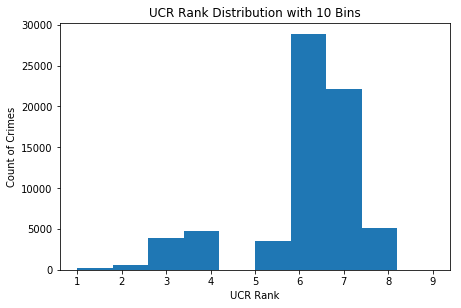

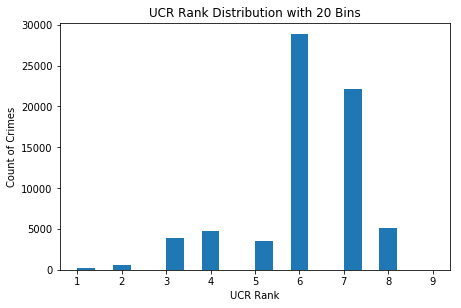

In [8]:
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211)
ax.hist(df['ucrrank'], bins=10, range=(df['ucrrank'].min(),df['ucrrank'].max()))
plt.title('UCR Rank Distribution with 10 Bins')
plt.xlabel('UCR Rank')
plt.ylabel('Count of Crimes')
plt.show()

fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(212)
ax.hist(df['ucrrank'], bins=20, range=(df['ucrrank'].min(),df['ucrrank'].max()))
plt.title('UCR Rank Distribution with 20 Bins')
plt.xlabel('UCR Rank')
plt.ylabel('Count of Crimes')
plt.show()

## Data Wrangling
It's important to wrangle your data before building your models, since ```scikit-learn``` cannot process missing values and only accepts numerical data. Outliers should also be dealt with beforehand, since they will negatively impact the performance of most machine learning models. 

### Outliers
When examining the histograms of the ```Fare``` data, did you notice any potential outliers? Since there is a relationship between the cost of a ticket and the class the passenger was traveling in, let's look at a box plot of this data to investigate further. 

In [ ]:
f, ax = plt.subplots(figsize=(9,7))
sns.boxplot(x='wa', y='offense', data=df, palette='vlag')
sns.swarmplot(x='shift', y='offense', data=df, size=2, color='0.3')
plt.title('UCR Rank By Shift', size=14)
plt.xlabel('Shift', size=12)
plt.ylabel('Offense', size=12)
plt.show()

We can quickly see that there a few first-class fares that are much higher than the others. Let's sort the data set by the ```Fare``` column so we can see the cost of the most expensive tickets.

In [ ]:
df.sort_values(by='ucrrank', ascending=False).head(10)

Since the ```$512``` fares appear to be outliers, let's replace them with ```$213```, since it is the second highest value and much closer to the other data points.

In [ ]:
for idx in df.index:
    if df.loc[idx].Fare > 500:
        df.set_value(idx, 'Fare', 263.0000)

### Dealing with Missing Data
When deciding how to handle missing values, it is important to know how prevalent they are in your data. Let's use ```pandas``` to find out how many ```Cabin``` values are missing from our data set.

__=>__ Use ```pandas``` to get the sum of all the null values in the ```Cabin``` column.

Documentation:    
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html    
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html

In [ ]:
# Sum the number of null Cabin values.

### Deleting a Feature


__=>__ Since most of the ```Cabin``` values are missing, let's use ```pandas``` to drop the column. We will also drop the ```Ticket``` column, since as we saw earlier, it contains of a mix of text and numeric data that doesn't appear to contain any useful information. *HINT: remember to set ```axis=1```.*

Documentation:  
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html  
https://chrisalbon.com/python/pandas_dropping_column_and_rows.html

In [ ]:
# Use pandas to drop the Cabin and Ticket columns.

### Filling in Missing Data
While the ```Age``` column also contains null values, it is missing far fewer than the ```Cabin``` column, so we will fill those in rather than drop the column. The simplest approach, which we'll use here, is to replace the null values with the mean age of the passengers.

__=>__ First use ```pandas``` to calculate and save the mean age of the passengers. Then replace the null values in the ```Age``` column with that number.

Documentation:  
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html     
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

In [ ]:
# First, use pandas to find the mean age of the passengers: mean_age
mean_age = 

# ...and then fill in the null Age values with mean_age.

In [ ]:
# Check that there are no more null values in the Age column.

### Save Your Work
...you will need it in a few weeks!

In [ ]:
import pandas.io.sql as pd_sql
import sqlite3 as sql

# Create a sqlite3 database to store the data.
con = sql.connect('titanic.db') 

__=>__ Use ```pandas``` to write your ```DataFrame``` to the ```sqlite``` database.

Documenation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html

In [ ]:
# Use pandas to save your dataframe to a sqlite database name 'training_data'.